In [1]:
import pandas as pd
import numpy as np
import pandas
import xlrd
import openpyxl
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
np.random.seed(41)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df= pd.read_csv('cleaned_loan.csv')
df.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term,home_ownership,verification_status,purpose
0,30000,22.35,1151.16,5,100000.0,1,30.46,0,0,11,1,15603,37.0,19,1,0,1,1,2
1,40000,16.14,975.71,0,45000.0,1,50.53,0,0,18,0,34971,64.5,37,0,1,1,2,1
2,20000,7.56,622.68,10,100000.0,1,18.92,0,0,9,0,25416,29.9,19,0,0,1,0,1
3,4500,11.31,147.99,10,38500.0,1,4.64,0,0,12,0,4472,15.3,25,0,0,3,0,1
4,8425,27.27,345.18,3,450000.0,1,12.37,0,0,21,0,36812,65.7,37,0,0,1,2,1


In [5]:
df.describe()


,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term,home_ownership,verification_status,purpose
count,47007.000000,47007.000000,47007.000000,47007.000000,4.700700e+04,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000,47007.000000
mean,14935.434084,13.433958,445.398867,6.305572,8.001621e+04,0.852916,18.458715,0.236475,0.560236,11.437445,0.158423,14375.288978,39.216495,24.202012,0.141702,0.271130,1.848278,0.858872,2.864850
std,10164.850522,5.521137,293.675788,3.723621,7.756004e+04,0.354194,19.171667,0.754447,0.804129,5.922279,0.407071,21527.701475,25.662983,12.782368,0.354136,0.444548,0.918241,0.760239,2.336235
min,1000.000000,5.310000,30.120000,0.000000,3.300000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.000000,9.440000,223.395000,3.000000,4.750000e+04,1.000000,10.270000,0.000000,0.000000,7.000000,0.000000,4107.000000,18.100000,15.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,12000.000000,12.610000,361.870000,7.000000,6.700000e+04,1.000000,16.640000,0.000000,0.000000,10.000000,0.000000,9122.000000,36.200000,22.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,20000.000000,16.910000,611.620000,10.000000,9.500000e+04,1.000000,23.885000,0.000000,1.000000,14.000000,0.000000,17452.000000,57.900000,31.000000,0.000000,1.000000,3.000000,1.000000,3.000000
max,40000.000000,30.990000,1628.080000,10.000000,9.300000e+06,1.000000,999.000000,19.000000,5.000000,65.000000,8.000000,925589.000000,132.200000,125.000000,3.000000,1.000000,3.000000,2.000000,12.000000


In [6]:
from sklearn.model_selection import train_test_split
y = df[["loan_status"]]
X = df.drop(columns=["loan_status"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
y.value_counts()

loan_status
1              40093
0               6914
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models
# no need to scale y due to the categorical nature of it
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)


In [10]:
#basic model, set only parameters: random_state=41 and class_weight
rfc=RandomForestClassifier(random_state=41)
rfc=rfc.fit(X_train, y_train.values.ravel())
score_rfc=rfc.score(X_test,y_test)
print("ramdom Forest score:{}".format(score_rfc))

ramdom Forest score:0.8535063461674821


0.8540005069088966


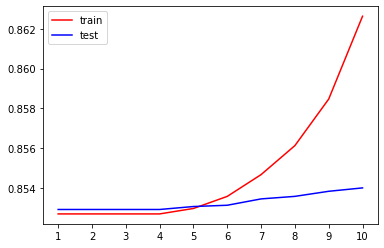

In [11]:
tr = []
te = []
for i in range(10):
    clf = RandomForestClassifier(random_state=41
                                 ,max_depth=i+1
                                 ,criterion="gini"
                               )
    clf = clf.fit(X_train_scaled, y_train.values.ravel())
    score_tr = clf.score(X_train_scaled, y_train.values.ravel())
    score_te = cross_val_score(clf,X,y.values.ravel(),cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [10]:
# import GridSerachCV to search for the best parameters combination
# test1
from sklearn.model_selection import GridSearchCV
params1 = {'n_estimators': [50,100,500],'max_depth':[3,4,5],'max_leaf_nodes':[2,4,5,20], "min_samples_leaf":[1,2,4,20],'random_state':[41], "n_jobs":[-1]}
grid = GridSearchCV(RandomForestClassifier(),params1,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train.values.ravel())
print(grid.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 41}


In [11]:
#after tuning parameters
best_model1 = RandomForestClassifier(**grid.best_params_)
best_model1.fit(X_train_scaled, y_train.values.ravel())
score_best_model1 = best_model1.score(X_test_scaled,y_test.values.ravel())
print("ramdom scaled Forest score:{}".format(score_best_model1))

ramdom scaled Forest score:0.8535772530667234


In [20]:
# import GridSerachCV to search for the best parameters combination
# test2
from sklearn.model_selection import GridSearchCV
params2 = {'class_weight':[{0:0.6,1:0.4}],'criterion':('entropy','gini'),'max_depth':[5],'max_leaf_nodes':[10,20,30,40], "min_samples_leaf":[1,2,3,4],'random_state':[41], "n_jobs":[-1]}
grid = GridSearchCV(RandomForestClassifier(),params2,refit=True,verbose=1)
grid.fit(X_train_scaled,y_train.values.ravel())
print(grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'class_weight': {0: 0.6, 1: 0.4}, 'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 1, 'n_jobs': -1, 'random_state': 41}


In [21]:
#after tuning parameters set 2
best_model2 = RandomForestClassifier(**grid.best_params_)
best_model2.fit(X_train_scaled, y_train.values.ravel())
score_best_model2 = best_model2.score(X_test_scaled,y_test.values.ravel())
print("ramdom scaled Forest score:{}".format(score_best_model2))

ramdom scaled Forest score:0.8534354392682408
